In [166]:
import pandas as pd
import enchant
import matplotlib.pyplot as plt
from functools import reduce
from wordcloud import WordCloud
from textblob import TextBlob

%matplotlib inline

In [138]:
d = enchant.Dict("en_US")

In [68]:
nominees = pd.read_csv('nominees.csv')
winners = pd.read_csv('winners.csv')

In [74]:
nominees[pd.isnull(nominees['plot'])]

,plot,title,year
1,NaN,The Racket (1928 film),1928
2,NaN,Seventh Heaven (1927 film),1928
5,NaN,The Hollywood Revue of 1929,1929
35,NaN,State Fair (1933 film),1933
47,NaN,The White Parade,1934
52,NaN,"Personal History, Adventures, Experience, and ...",1935
56,NaN,Les Misérables (1935 film),1935
65,NaN,Romeo and Juliet (1936 film),1936
69,NaN,Three Smart Girls,1936
82,NaN,Alexander's Ragtime Band (film),1938


In [73]:
nominees.iloc[108,0] = """
The Stage Manager introduces the audience to the small town of Grover's Corners, New Hampshire, and the people living there as a morning begins in the year 1901. Professor Willard speaks to the audience about the history of the town. Joe Crowell delivers the paper to Doc Gibbs, Howie Newsome delivers the milk, and the Webb and Gibbs households send their children (Emily and George, respectively) off to school on this beautifully simple morning. Three years have passed, and George and Emily prepare to wed. The day is filled with stress. Howie Newsome is delivering milk in the pouring rain while Si Crowell, younger brother of Joe, laments how George's baseball talents will be squandered. George pays an awkward visit to his soon-to-be in-laws. Here, the Stage Manager interrupts the scene and takes the audience back a year, to the end of Emily and George's junior year. Emily confronts George about his pride, and over an ice cream soda, they discuss the future and their love for each other. George resolves not to go to college, as he had planned, but to work and eventually take over his uncle's farm. In the present, George and Emily say that they are not ready to marry—George to his mother, Emily to her father—but they both calm down and happily go through with the wedding. Nine years have passed. The Stage Manager opens the act with a lengthy monologue emphasizing eternity, bringing the audience's attention to the cemetery outside of town and the characters who have died since the wedding, including Mrs. Gibbs (pneumonia, while traveling), Wally Webb (burst appendix, while camping), Mrs. Soames, and Simon Stimson (suicide by hanging). Town undertaker Joe Stoddard is introduced, as is a young man named Sam Craig who has returned to Grover's Corners for his cousin's funeral. That cousin is Emily, who died giving birth to her and George's second child. Once the funeral ends, Emily emerges to join the dead; Mrs. Gibbs urges her to forget her life, but she refuses. Ignoring the warnings of Simon, Mrs. Soames, and Mrs. Gibbs, Emily returns to Earth to relive one day, her 12th birthday. The memory proves too painful for her, and she realizes that every moment of life should be treasured. When she asks the Stage Manager if anyone truly understands the value of life while they live it, he responds, "No. The saints and poets, maybe—they do some." Emily returns to her grave next to Mrs. Gibbs and watches impassively as George kneels weeping over her. The Stage Manager concludes the play and wishes the audience a good night.
"""

In [100]:
winnerslist = winners['plot'].values
nomineeslist = nominees[~pd.isnull(nominees['plot'])]['plot'].values

In [101]:
winnersplotoverall = reduce(lambda x,y: x + ' ' + y, winnerslist)
nomineesplotoverall = reduce(lambda x,y: x + ' ' + y, nomineeslist)

In [186]:
wo = TextBlob(winnersplotoverall)
wo_tags = wo.tags

In [187]:
filtered = [w[0] for w in wo_tags if (w[1].startswith('NN')) or (w[1].startswith('JJ')) or (w[1].startswith('VB'))]

In [201]:
no = TextBlob(nomineesplotoverall)
no_tags = no.tags
filtered_no = [w[0] for w in no_tags if (w[1].startswith('NN')) or (w[1].startswith('JJ')) or (w[1].startswith('VB'))]

In [178]:
list(filter(check,filtered))

[]

In [181]:
fil

True

In [180]:
for w in filtered:
    print(w)
    print(d.check(str(w)))

Jack


Error: Don't pass bytestrings to pyenchant

In [143]:
[w for w in filtered if d.check(str(w))]

Error: Don't pass bytestrings to pyenchant

In [202]:
winnerscloud_allyears = WordCloud(width=2000, height=1000, background_color='white').generate(' '.join(filtered))
nomineescloud_allyears = WordCloud(width=2000, height=1000, background_color='white').generate(' '.join(filtered_no))

In [104]:
len(winnersplotoverall)

368878

(-0.5, 1999.5, 999.5, -0.5)

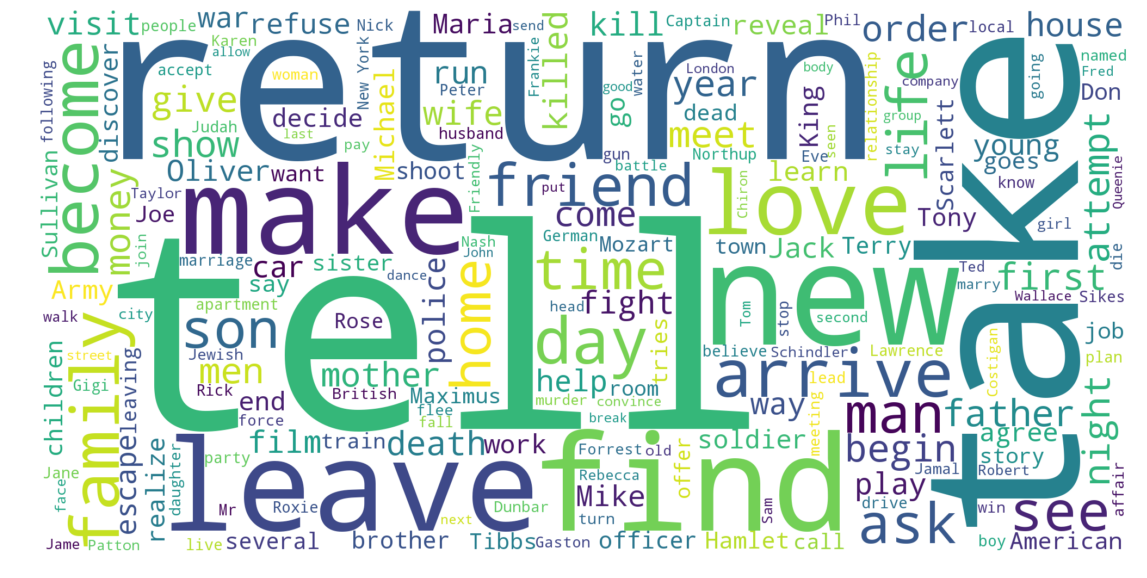

In [199]:
plt.figure(figsize=(20,10))
plt.imshow(winnerscloud_allyears, interpolation='bilinear')
plt.axis("off")

(-0.5, 1999.5, 999.5, -0.5)

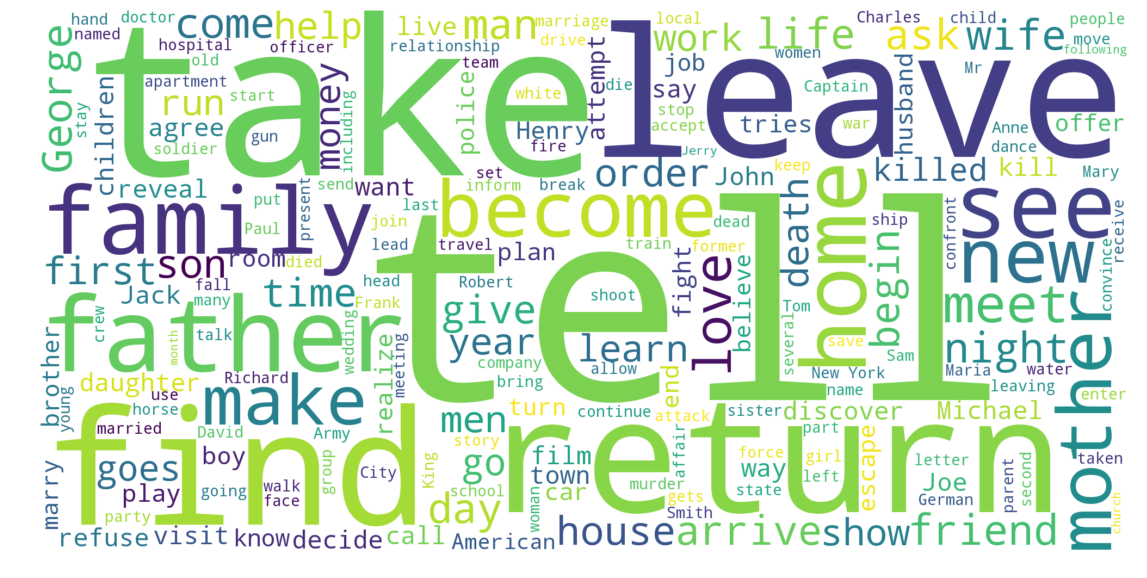

In [203]:
plt.figure(figsize=(20,10))
plt.imshow(nomineescloud_allyears, interpolation='bilinear')
plt.axis("off")

In [117]:
# look at word cloud changes over the decades

In [ ]:
# sentiment analysis

In [116]:
# wikipedia summary classifier probability of win

In [122]:
nominees[nominees['title'].str.startswith('Broke')].loc[446,'plot']

'In 1963, Ennis Del Mar and Jack Twist are hired by Joe Aguirre to herd his sheep through the summer in the Wyoming mountains. After a night of heavy drinking, Jack makes a pass at Ennis, who is initially hesitant but eventually responds to Jack\'s advances. Despite Ennis telling Jack that it was a one-time incident, they develop a passionate sexual and emotional relationship. After Jack and Ennis eventually part ways, Ennis marries his longtime fiancée Alma Beers and has two daughters with her. Jack returns the next summer seeking work, but Aguirre, who observed Jack and Ennis on the mountain, refuses to rehire him. Jack moves to Texas, where he meets, marries, and has a son with rodeo rider Lureen Newsome. After four years, Jack visits Ennis. Upon meeting, the two kiss passionately, and Alma inadvertently observes this. Jack broaches the subject of creating a life together on a small ranch, but Ennis, haunted by a childhood memory of the torture and murder of two men suspected of hom